# <div align="center">**Table of Contents**
1. [<span style="color:green">**About This Dataset**](#1)<br>
2. [<span style="color:green">**Import Libraries**](#2)<br>
3. [<span style="color:green">**Load Data**](#3)<br>
4. [<span style="color:green">**Data Cleaning**](#4)<br>
5. [<span style="color:green">**Data Visualization**](#5)<br> 
6. [<span style="color:green">**Class Distribution**](#6)<br> 
7. [<span style="color:green">**Data Preparation**](#7)<br> 
8. [<span style="color:green">**Classification**](#8)<br> 
9. [<span style="color:green">**Test Data**](#9)<br> 

# <span style="color:green"><div align="center">**About This Dataset** <a  name="1"></a>

Customer segmentation is the practice of dividing a customer base into groups of individuals that are similar in specific ways relevant to marketing, such as age, gender, interests and spending habits.

Companies employing customer segmentation operate under the fact that every customer is different and that their marketing efforts would be better served if they target specific, smaller groups with messages that those consumers would find relevant and lead them to buy something. Companies also hope to gain a deeper understanding of their customers' preferences and needs with the idea of discovering what each segment finds most valuable to more accurately tailor marketing materials toward that segment

In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for different segment of customers. This strategy has work exceptionally well for them. They plan to use the same strategy on new markets and have identified 2627 new potential customers.

You are required to help the manager to predict the right group of the new customers.

#### <span style="color:green">  **Columns**
    
>**ID** Unique ID <br>
>**Gender**  Gender of the customer <br> 
>**Ever_Married** Marital status of the customer <br>
>**Age**  Age of the customer <br>
>**Graduated** Is the customer a graduate? <br>
>**Profession** Profession of the customer <br>
>**Work_Experience** Work Experience in years <br>
>**Spending_Score** Spending score of the customer <br>
>**Family_Size** Number of family members for the customer (including the customer). <br>
>**Var_1** Anonymised Category for the customer <br>
>**Segmentation** Customer Segment of the customer <br>
#### <span style="color:green">  **Source** https://www.kaggle.com/vetrirah/customer?select=Train.csv

# <span style="color:green"><div align="center">**Import Libraries** <a  name="2"></a>

In [1]:
import warnings
import numpy as np 
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.impute import KNNImputer
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import plotly.offline 
from sklearn.metrics import classification_report
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import decomposition
from matplotlib import pyplot
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor

%matplotlib inline
np.random.seed(1)
warnings.filterwarnings('ignore')

# <span style="color:green"><div align="center">**Load Data** <a  name="3"></a>

In [2]:
df_train = pd.read_csv("Train.csv")
df_test = pd.read_csv("Test.csv")

print(f'\nTrain data shape - {df_train.shape}')
print(f'Test data shape - {df_test.shape} \n')

df_train.head()


Train data shape - (8068, 11)
Test data shape - (2627, 10) 



,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


#### <span style="color:green">Let us first review the general information of the data 

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


#### <span style="color:blue"> As you can see most of the data types are object so we need to convert them into numerical variables 

In [4]:
df_train.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


#### <span style="color:blue"> At first glance we would probably need to normalize

# <span style="color:green"><div align="center">**Data cleaning** <a  name="4"></a>

#### <span style="color:green"> Check if we have duplicate applicants

In [5]:
duplicates = df_train[df_train.duplicated(subset = df_train.columns.drop("Segmentation"))]
duplicates

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation


#### <span style="color:green"> Check for null values in the data

In [6]:
train_without_nan = len(df_train.drop(columns ="Segmentation").dropna())
test_without_nan = len(df_test.dropna())
print(f"\nPercentage of applicants who have at least one null feature - TRAIN - {(1-train_without_nan/len(df_train))*100}")
print(f"Percentage of applicants who have at least one null feature - TEST -  {(1-test_without_nan/len(df_test))*100}\n")


Percentage of applicants who have at least one null feature - TRAIN - 17.389687654933073
Percentage of applicants who have at least one null feature - TEST -  18.00532927293491



In [7]:
null_df = pd.concat([pd.DataFrame(df_train.isna().sum()),pd.DataFrame(df_test.isna().sum())],axis=1)
null_df.columns = ["Train_Nan","Test_Nan"]
null_df

,Train_Nan,Test_Nan
ID,0,0.0
Gender,0,0.0
Ever_Married,140,50.0
Age,0,0.0
Graduated,78,24.0
Profession,124,38.0
Work_Experience,829,269.0
Spending_Score,0,0.0
Family_Size,335,113.0
Var_1,76,32.0


#### <span style="color:blue"> As we see null values are 17% of our data so we can't drop them we need to fill. <br> But I have to drop applicants who have 3 or more null features because if I fill them they will not be accurate <br> Here is the percentage of such applicants

#### <span style="color:green"> Let's check percentage of applicants who have 3 or more null features

In [8]:
print(f"\nPercentage of applicants who have 3 or more null feature - TRAIN - \
{len(df_train.loc[df_train.isnull().sum(axis=1)>=3])/len(df_train)*100}")

print(f"Percentage of applicants who have 3 or more null feature - TEST  - \
{len(df_test.loc[df_test.isnull().sum(axis=1)>=3])/len(df_test)*100}")


Percentage of applicants who have 3 or more null feature - TRAIN - 0.23549826474962818
Percentage of applicants who have 3 or more null feature - TEST  - 0.22839741149600304


#### <span style="color:blue"> As we see the number of such applicants is 0.2 percent of our data so we can drop them

# <span style="color:green"><div align="center">**Data visualization** <a  name="5"></a> 

#### <span style="color:green"> Let's see distribution of categorical features which have 2 or 3 categories

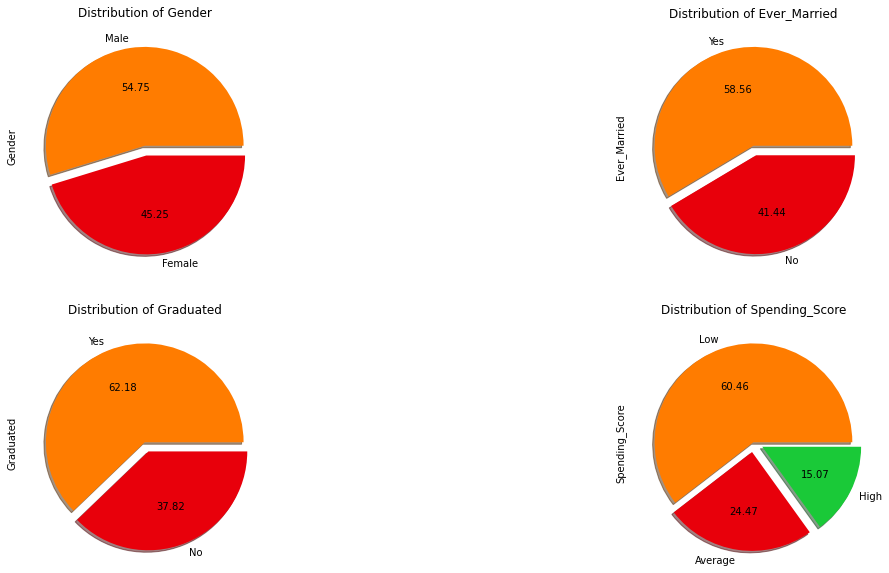

In [9]:
f, ax  = plt.subplots(2,2,figsize = (20,10))
colors=["#FF7C00", "#E8000B","#1AC938"]
df_train['Gender'].value_counts().plot.pie(title='Distribution of Gender',explode=[0,.1],
                                           ax=ax[0][0],autopct="%.2f",shadow = True,colors = colors)

df_train['Ever_Married'].value_counts().plot.pie(title='Distribution of Ever_Married',explode=[0,.1],
                                                 ax=ax[0][1],autopct="%.2f",shadow = True,colors = colors)

df_train['Graduated'].value_counts().plot.pie(title='Distribution of Graduated',explode=[0,.1],
                                              ax=ax[1][0],autopct="%.2f",shadow = True,colors = colors)

df_train['Spending_Score'].value_counts().plot.pie(title='Distribution of Spending_Score',
                                                   ax=ax[1][1],explode=[0,.1,.1],autopct="%.2f",shadow = True,colors=colors)
f.patch.set_facecolor('white')
plt.show()


#### <span style="color:blue">  from these plots we can determine that:<br> 1. most of our patients are men<br> 2. people who are graduated<br> 3. who are Ever married<br> 4. who have low Spending score <br>

#### <span style="color:green"> Let's see distribution other categorical features which have a little more categories so I plot them by countplot

<AxesSubplot:xlabel='Var_1', ylabel='count'>

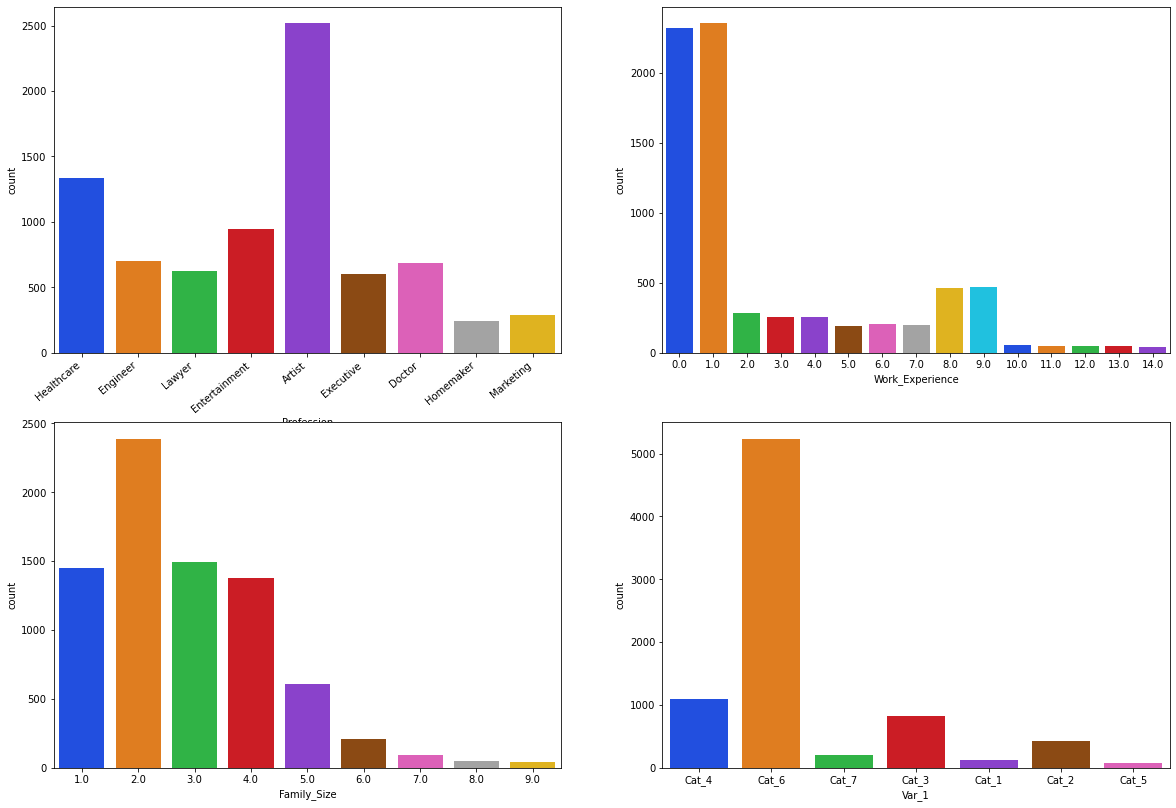

In [10]:
f, ax  = plt.subplots(2,2,figsize = (20,14))
colors=["#023EFF","#FF7C00", "#E8000B","#1AC938"]
labels = ["D","C","A","B"]

ax1 = sns.countplot(df_train['Profession'],ax=ax[0][0],palette = "bright")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")

sns.countplot(df_train['Work_Experience'],ax=ax[0][1],palette = "bright")
sns.countplot(df_train['Family_Size'],ax=ax[1][0],palette = "bright")
sns.countplot(df_train['Var_1'],ax=ax[1][1],palette = "bright")


#### <span style="color:blue">  from these plots we can determine that:<br> 1. most of our patients are Artist<br> 2. people who have a little work experience<br> 3. who has 1 family member<br> 4. most of them ar from 6 category <br>

#### <span style="color:green"> Let's see distribution of Age which is our only numerical data

In [11]:
def createPlot(data, col:str, ttext:str, xtext:str, ytext:str) ->None:
    """
    this function creates histogram and boxplot by pyplot library and also count skewness
    
    Arguments:
    data -- pandas dataframe
    col -- column name which we want to plot
    ttext -- string which we want to write on top of the graph
    xtext -- string which we want to write on x axis
    ytext -- string which we want to write on y axis
    
    Returns:
    None
    """
    plotly.offline.init_notebook_mode(connected=True)
    fig = make_subplots(rows=1, cols=2)
    fig.add_trace(go.Histogram(x=data[col],marker_color='#6a6fff'),row=1,col=1)
    fig.add_trace(go.Box(x=data[col]),row=1,col=2)
    
    fig.update_layout(
        title_text=ttext,
        xaxis_title_text=xtext,
        yaxis_title_text=ytext, 
        bargap=0.05, 
        template = 'plotly_dark',
        width=900, height=600
    )
    
    fig.show()

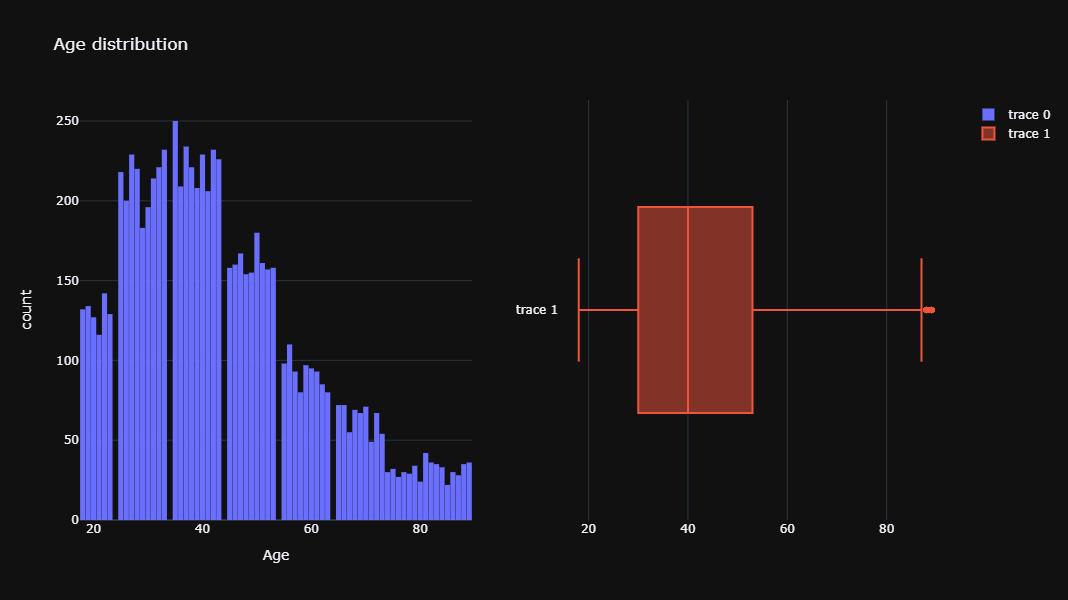

In [12]:
createPlot(df_train,"Age","Age distribution","Age","count")

#### <span style="color:blue">  We can see that most of our applicants are in middle age median is 41 <br> also we don'have applicats in this age 24 34 44 54 64 it's a little surprising why <br> minimum age is 18 and maximum 89 

# <span style="color:green"><div align="center">**Class Distribution** <a  name="6"></a> 

#### <span style="color:green"> Also see if the distribution of classes has imbalance

<AxesSubplot:xlabel='Segmentation', ylabel='count'>

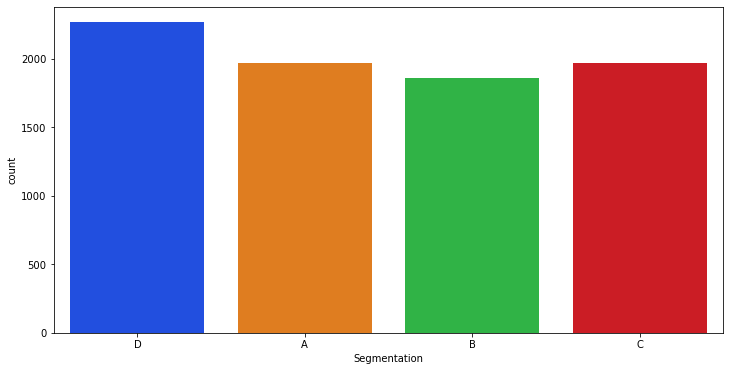

In [13]:
f, ax = plt.subplots(figsize=(12, 6))

sns.countplot(df_train['Segmentation'],palette = "bright")

#### <span style="color:green"> So our data data is not unbalanced

# <span style="color:green"><div align="center">**Data preparation** <a  name="7"></a>

#### <span style="color:green"> Label encoding 

#### <span style="color:green"> Before we do the label encoding let’s look at the data

In [18]:
df_train.head(3)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B


In [19]:
def get_encoded_dict(df,lst):
    """
    this function creates dictionary for encoding. Its find unique labels for each column and enumerate them
    
    Arguments:
    df -- pandas dataframe
    lst -- list of columns which we want to encode 
    
    Returns:
    dictionary where key is column name and value is dictionary of unique labels and encoding value
    """
    encoded_dict = {}
    for col in lst:
        each_dict = {}
        sorted_unique_names = df[col].dropna().unique()
        sorted_unique_names.sort()
        for i,val in enumerate(sorted_unique_names):
            each_dict[val] = i
        encoded_dict[col] = each_dict
    return encoded_dict

In [20]:
encoded_dict = get_encoded_dict(df_train,["Gender","Ever_Married","Graduated","Profession","Spending_Score","Var_1","Segmentation"])

duplicates = duplicates.replace(encoded_dict)

df_train = df_train.replace(encoded_dict)
df_test = df_test.replace(encoded_dict)

In [21]:
df_train.head(3)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0.0,22,0.0,5.0,1.0,2,4.0,3.0,3
1,462643,0,1.0,38,1.0,2.0,NaN,0,3.0,3.0,0
2,466315,0,1.0,67,1.0,2.0,1.0,2,1.0,5.0,1


#### <span style="color:blue"> As we can see the data consists only numbers

#### <span style="color:green"> Handle Missing Data

#### <span style="color:green"> first of all we need to drop applicants who have 3 or more null features

In [22]:
print(f"Train data shape before {df_train.shape}")
print(f"Test  data shape before {df_test.shape}")

df_train = df_train.loc[df_train.drop(columns = "Segmentation").isnull().sum(axis=1)<3]
df_test = df_test.loc[df_test.isnull().sum(axis=1)<3]

print(f"\nTrain data shape after {df_train.shape}")
print(f"Test  data shape after {df_test.shape}")

Train data shape before (8068, 11)
Test  data shape before (2627, 10)

Train data shape after (8049, 11)
Test  data shape after (2621, 10)


#### <span style="color:green">  Now we need to fill other null values. We have several methods for this:
    1. Using (Mean/Median) Values
    2. Using (Most Frequent) or (Zero/Constant) Values
    3. Using k-NN
#### <span style="color:green"> In this case I will use k-NN method because we don't have big data so it will work fast and it consider that we may have similar data

#### <span style="color:green"> First let's see how many Nan values we have

In [23]:
null_df = pd.concat([pd.DataFrame(df_train.isna().sum()),pd.DataFrame(df_test.isna().sum())],axis=1)
null_df.columns = ["Train_Nan","Test_Nan"]
null_df

,Train_Nan,Test_Nan
ID,0,0.0
Gender,0,0.0
Ever_Married,134,48.0
Age,0,0.0
Graduated,72,23.0
Profession,113,35.0
Work_Experience,813,264.0
Spending_Score,0,0.0
Family_Size,320,109.0
Var_1,72,29.0


In [24]:
imputer = KNNImputer()

df_train[df_train.columns.drop(["ID","Segmentation"])] = np.round(imputer.fit_transform(df_train.drop(columns = ["ID","Segmentation"])))
df_test[df_test.columns.drop(["ID"])] = np.round(imputer.fit_transform(df_test.drop(columns = ["ID"])))

In [25]:
null_df = pd.concat([pd.DataFrame(df_train.isna().sum()),pd.DataFrame(df_test.isna().sum())],axis=1)
null_df.columns = ["Train_Nan","Test_Nan"]
null_df

,Train_Nan,Test_Nan
ID,0,0.0
Gender,0,0.0
Ever_Married,0,0.0
Age,0,0.0
Graduated,0,0.0
Profession,0,0.0
Work_Experience,0,0.0
Spending_Score,0,0.0
Family_Size,0,0.0
Var_1,0,0.0


#### <span style="color:blue"> As we saw now we don't have Nan values

#### <span style="color:green"> Min-Max normalization

#### <span style="color:green"> Before we do Min-Max normalization let’s look at the data

In [26]:
df_train.head(3)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1.0,0.0,22.0,0.0,5.0,1.0,2.0,4.0,3.0,3
1,462643,0.0,1.0,38.0,1.0,2.0,5.0,0.0,3.0,3.0,0
2,466315,0.0,1.0,67.0,1.0,2.0,1.0,2.0,1.0,5.0,1


In [27]:
scaler = MinMaxScaler()
columns_to_normalize = ['Age','Profession','Work_Experience','Spending_Score','Family_Size','Var_1']

df_train[columns_to_normalize] = scaler.fit_transform(df_train[columns_to_normalize])
df_test[columns_to_normalize] = scaler.fit_transform(df_test[columns_to_normalize])

df_train.head(3)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1.0,0.0,0.056338,0.0,0.625,0.071429,1.0,0.375,0.500000,3
1,462643,0.0,1.0,0.281690,1.0,0.250,0.357143,0.0,0.250,0.500000,0
2,466315,0.0,1.0,0.690141,1.0,0.250,0.071429,1.0,0.000,0.833333,1


#### <span style="color:blue"> As we saw now we have all value in range 0-1

#### <span style="color:green"> Let’s look correlation matrix 

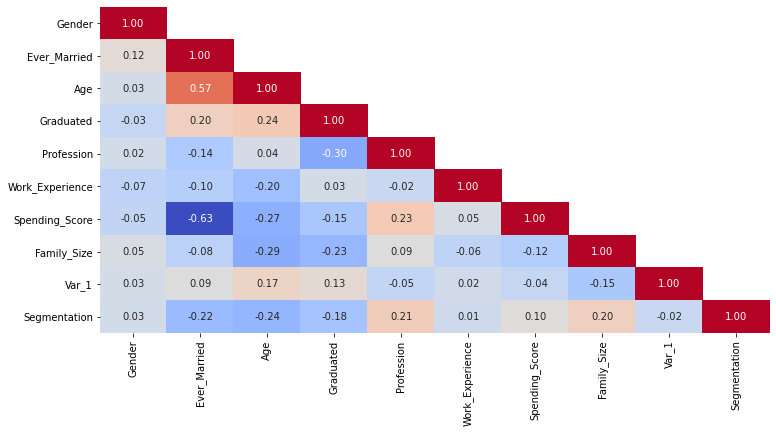

In [28]:
matrix = df_train.drop(columns=["ID"]).corr()
f, ax = plt.subplots(figsize=(12, 6))
with sns.axes_style("white"):
    sns.heatmap(matrix,mask=np.triu(matrix,1),annot=True,fmt=".2f", vmax=.8,cbar=False,cmap="coolwarm");

#### <span style="color:blue"> As we see "Ever_Married" and "Spending_Score" are high correlated so we need one of them

# <span style="color:green"><div align="center">**Classification** <a  name="8"></a>

#### <span style="color:green"> Before we do Classification let’s choose classification and Reporting variables

#### <span style="color:green"> Plot bar charts which will show feature importances. <br> For this plot I will use Decision Trees which is one of the most appropriate method for this kind of finding

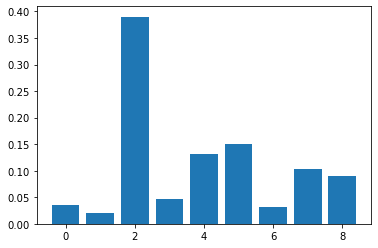

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df_train.drop(columns=["ID","Segmentation"]), df_train["Segmentation"], test_size=0.3, random_state=42)

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
importance = model.feature_importances_
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [30]:
X_train.head(1)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
5574,1.0,1.0,0.690141,1.0,0.75,0.071429,0.0,0.125,0.166667


#### <span style="color:blue"> From this plot we can find the least important variable which is "Ever_Married" <br> But I think we can't drop it because as we saw in correlation matrix "Ever_Married" and "Spending_Score" are high correlated <br> so we need to leave one of them

#### <span style="color:blue"> I will use "Gender" and "Spending_Score" in reporting variables

#### <span style="color:green"> Now we can create a model <br> let's create K-means model with different clusters and see Elbow plot

In [31]:
wcss=[]
for i in range(1,10):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(df_train.drop(columns=["ID","Segmentation","Gender","Spending_Score"]))
    wcss.append(kmeans.inertia_)

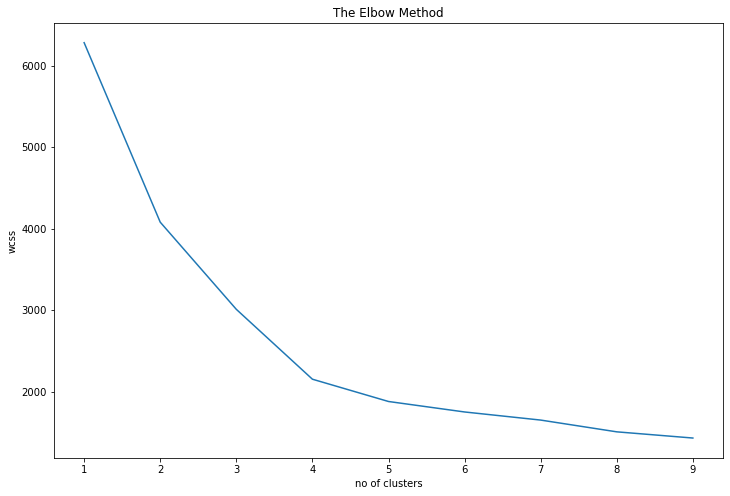

In [32]:
plt.figure(figsize=(12,8))
plt.plot(range(1,10), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

#### <span style="color:blue"> As we see [Elbow Method](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html) shows that we should get 4 clusters <br> But if we want to make sure try kneelocator

In [33]:
kl = KneeLocator(range(1, 10), wcss, curve="convex", direction="decreasing")
kl.elbow

4

#### <span style="color:blue"> This also showed that 4 clusters are optimal

#### <span style="color:green"> Now we need to plot this data and see how k-means separate them <br> so we should use [PCA](https://medium.com/@dmitriy.kavyazin/principal-component-analysis-and-k-means-clustering-to-visualize-a-high-dimensional-dataset-577b2a7a5fe2) algorithm to reduction dimension and plot 

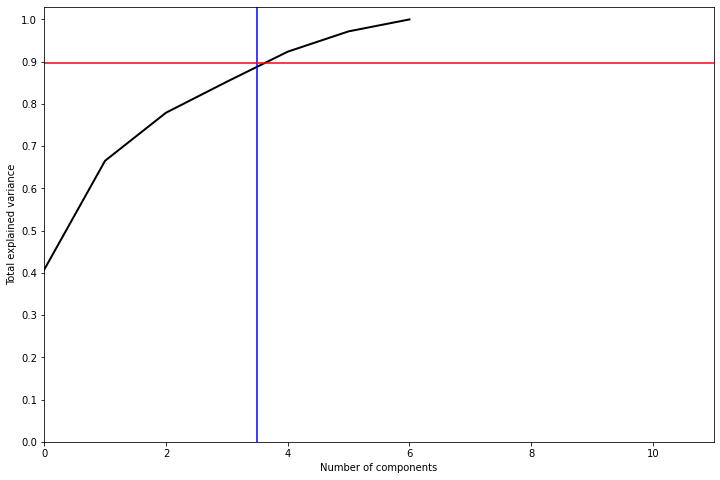

In [34]:
pca = PCA().fit(df_train.drop(columns=["ID","Segmentation","Gender","Spending_Score"]))

plt.figure(figsize=(12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 11)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(3.5, c='b')
plt.axhline(0.896, c='r')
plt.show();

#### <span style="color:blue"> This plot shows that 2 component is enough to see Data so we will see clearly picture

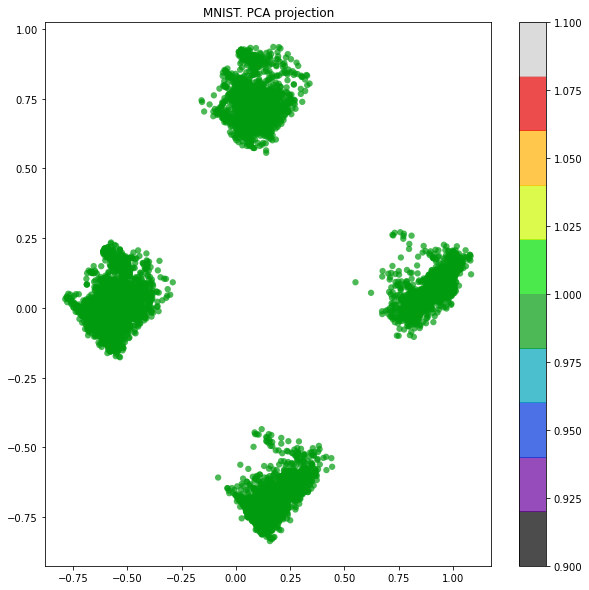

In [35]:
pca = decomposition.PCA(n_components=2)
X_reduced_train = pca.fit_transform(df_train.drop(columns=["ID","Segmentation","Gender","Spending_Score"]))

plt.figure(figsize=(10,10))
plt.scatter(X_reduced_train[:, 0], X_reduced_train[:, 1], c=[1]*df_train.shape[0], 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. PCA projection');

#### <span style="color:blue"> With this picture we have made sure once again that the number of optimal classes is 4

#### <span style="color:blue"> It's data distribution and let's see how it would be separated with KMeans

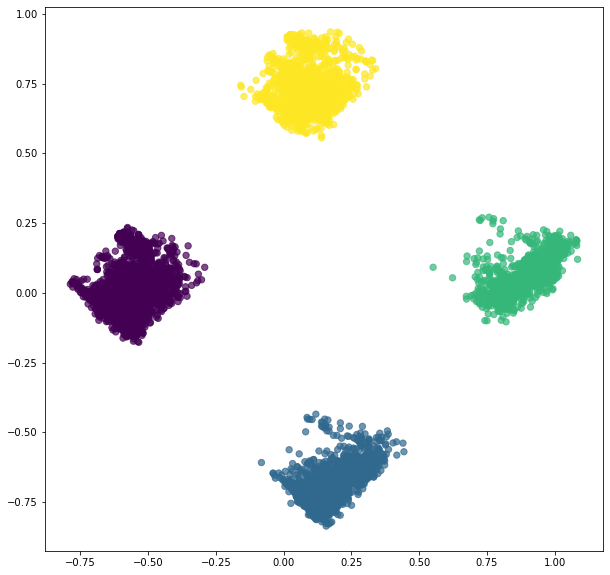

In [36]:
f, ax  = plt.subplots(figsize = (10,10))

kmeansmodel = KMeans(n_clusters= 4, init='k-means++',random_state=0)
y_kmeans_train = kmeansmodel.fit_predict(X_reduced_train)

plt.scatter(X_reduced_train[:,0], X_reduced_train[:,1], c=y_kmeans_train, alpha=0.7, s=40)

# <span style="color:green"><div align="center">**Test Data** <a  name="9"></a>

#### <span style="color:green"> For now we can see reporting variables distribution in Test data and compare  

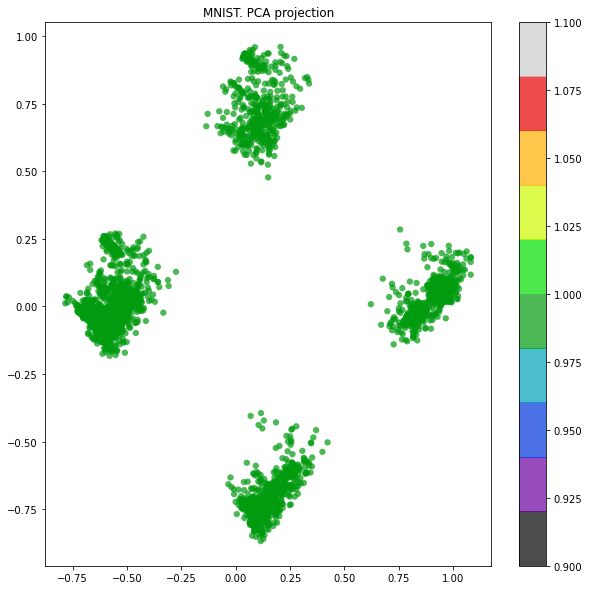

In [37]:
pca = decomposition.PCA(n_components=2)
X_reduced_test = pca.fit_transform(df_test.drop(columns=["ID","Gender","Spending_Score"]))

plt.figure(figsize=(10,10))
plt.scatter(X_reduced_test[:, 0], X_reduced_test[:, 1], c=[1]*df_test.shape[0], 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. PCA projection');

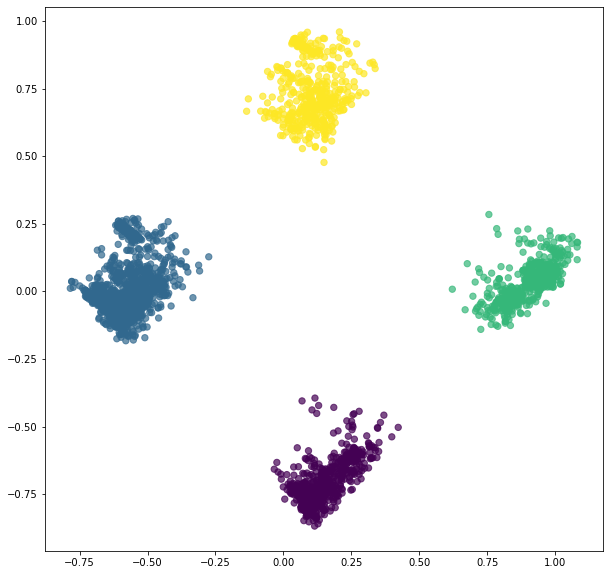

In [38]:
f, ax  = plt.subplots(figsize = (10,10))

kmeansmodel = KMeans(n_clusters= 4, init='k-means++',random_state=0)
y_kmeans_test = kmeansmodel.fit_predict(X_reduced_test)
    
plt.scatter(X_reduced_test[:,0], X_reduced_test[:,1], c=y_kmeans_test, alpha=0.7, s=40)

#### <span style="color:blue"> As we see test classes are grouped about the same as in the training

#### <span style="color:green"> Now we can get the same classes from both the test and training datasets <br> compare the distribution of the reporting variables to the given class

In [39]:
df_test=df_test.reset_index()
df_kmeans = pd.DataFrame(y_kmeans_test)
df_kmeans.columns = ["k-means_label"]

df_test=pd.concat([df_test,df_kmeans],axis=1)
df_test

,index,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,k-means_label
0,0,458989,0.0,1.0,0.253521,1.0,0.250,0.000000,1.0,0.000,0.833333,1
1,1,458994,1.0,1.0,0.267606,1.0,0.625,0.571429,0.0,0.375,0.833333,1
2,2,458996,0.0,1.0,0.718310,0.0,0.125,0.000000,1.0,0.000,0.833333,3
3,3,459000,1.0,1.0,0.577465,0.0,0.500,0.785714,0.5,0.125,0.833333,3
4,4,459001,0.0,0.0,0.014085,0.0,1.000,0.142857,1.0,0.375,0.833333,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2616,2622,467954,1.0,0.0,0.154930,0.0,0.625,0.642857,1.0,0.375,0.833333,2
2617,2623,467958,0.0,0.0,0.239437,1.0,0.125,0.071429,1.0,0.000,0.833333,0
2618,2624,467960,0.0,0.0,0.492958,1.0,0.375,0.071429,1.0,0.125,0.833333,0
2619,2625,467961,1.0,1.0,0.408451,1.0,0.500,0.071429,0.5,0.500,0.500000,1


In [40]:
df_train=df_train.reset_index()
df_kmeans = pd.DataFrame(y_kmeans_train)
df_kmeans.columns = ["k-means_label"]

df_train=pd.concat([df_train,df_kmeans],axis=1)
df_train

,index,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,k-means_label
0,0,462809,1.0,0.0,0.056338,0.0,0.625,0.071429,1.0,0.375,0.500000,3,2
1,1,462643,0.0,1.0,0.281690,1.0,0.250,0.357143,0.0,0.250,0.500000,0,0
2,2,466315,0.0,1.0,0.690141,1.0,0.250,0.071429,1.0,0.000,0.833333,1,0
3,3,461735,1.0,1.0,0.690141,1.0,0.875,0.000000,0.5,0.125,0.833333,1,0
4,4,462669,0.0,1.0,0.309859,1.0,0.375,0.357143,0.5,0.625,0.833333,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8044,8063,464018,1.0,0.0,0.056338,0.0,0.750,0.000000,1.0,0.750,0.000000,3,2
8045,8064,464685,1.0,0.0,0.239437,0.0,0.500,0.214286,1.0,0.375,0.500000,3,2
8046,8065,465406,0.0,0.0,0.211268,1.0,0.625,0.071429,1.0,0.000,0.833333,3,1
8047,8066,467299,0.0,0.0,0.126761,1.0,0.625,0.071429,1.0,0.375,0.833333,1,1


In [41]:
# This feature gives us classes separately
def get_classes(df,col,rng):
    _classes = []
    
    for i in range(rng):
        _classes.append(df[df[col]==i])
    
    return _classes

In [42]:
test_class_0, test_class_1, test_class_2, test_class_3 = get_classes(df_test,"k-means_label",4)

train_class_0, train_class_1, train_class_2, train_class_3 = get_classes(df_train,"k-means_label",4)

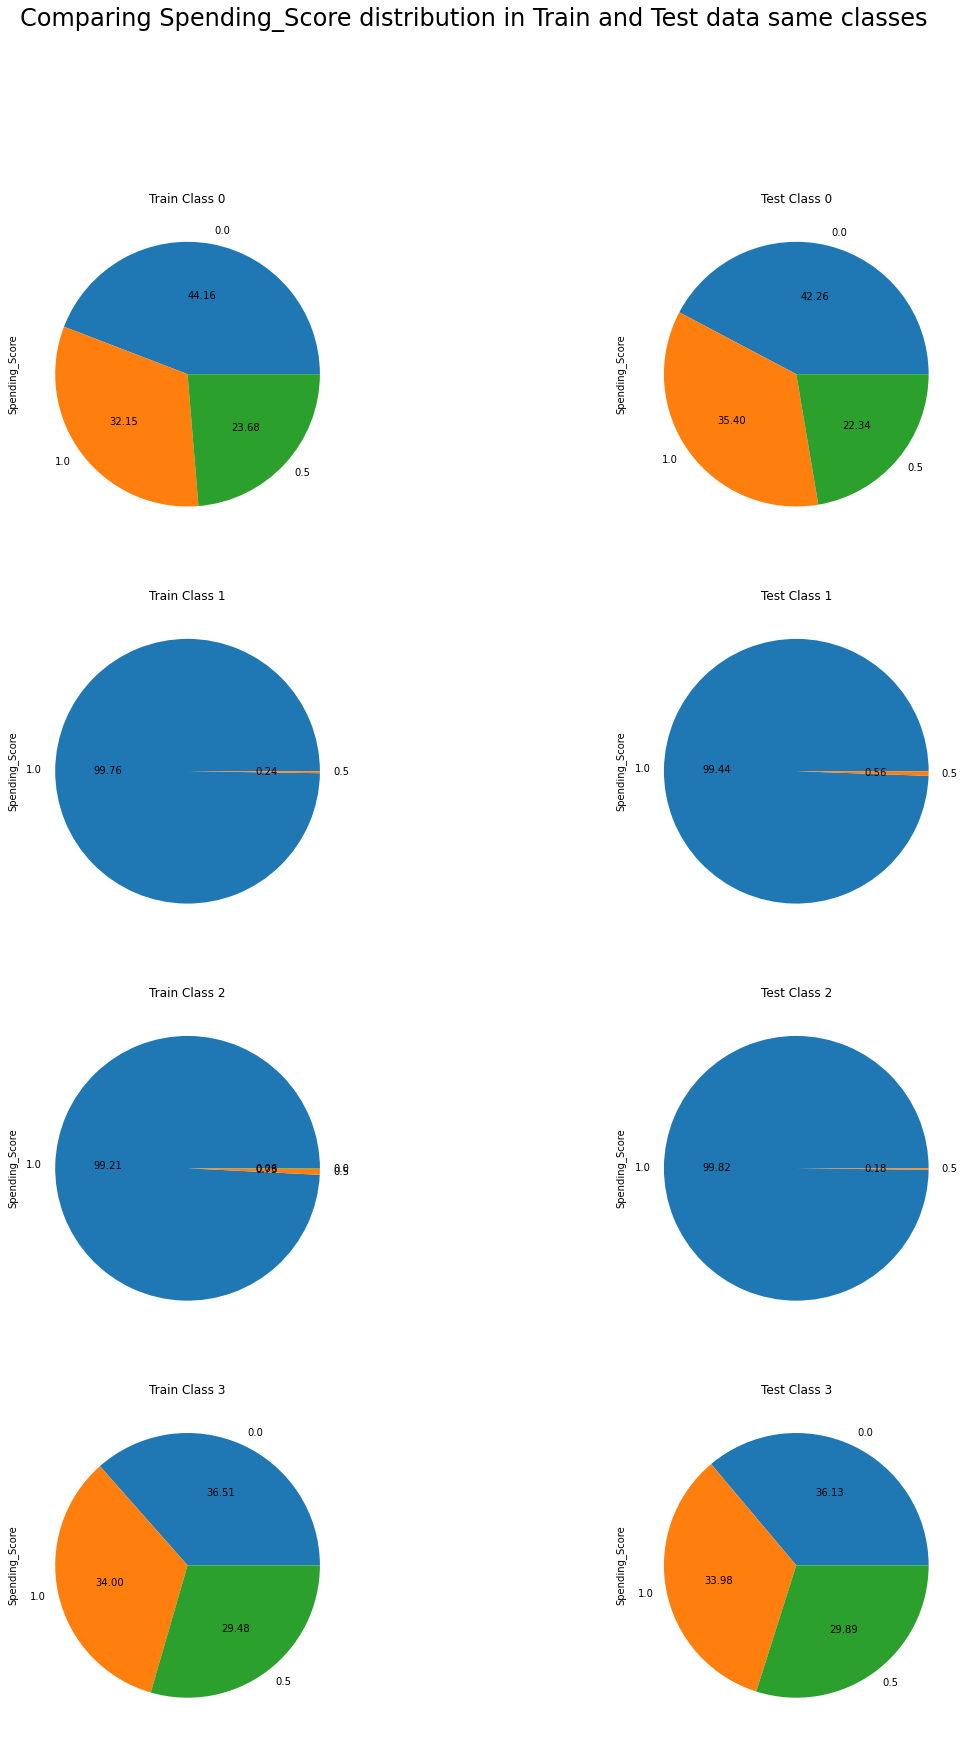

In [43]:
 f, ax  = plt.subplots(4,2,figsize = (20,28))
f.suptitle("Comparing Spending_Score distribution in Train and Test data same classes", fontsize=24)

train_class_0['Spending_Score'].value_counts().plot.pie(title='Train Class 0', ax=ax[0][0], autopct="%.2f")
test_class_1['Spending_Score'].value_counts().plot.pie(title='Test Class 0', ax=ax[0][1], autopct="%.2f")

train_class_1['Spending_Score'].value_counts().plot.pie(title='Train Class 1', ax=ax[1][0], autopct="%.2f")
test_class_0['Spending_Score'].value_counts().plot.pie(title='Test Class 1', ax=ax[1][1], autopct="%.2f")

train_class_2['Spending_Score'].value_counts().plot.pie(title='Train Class 2', ax=ax[2][0], autopct="%.2f")
test_class_2['Spending_Score'].value_counts().plot.pie(title='Test Class 2', ax=ax[2][1],autopct="%.2f")

train_class_3['Spending_Score'].value_counts().plot.pie(title='Train Class 3', ax=ax[3][0], autopct="%.2f")
test_class_3['Spending_Score'].value_counts().plot.pie(title='Test Class 3', ax=ax[3][1], autopct="%.2f")

f.patch.set_facecolor('white')
plt.show()

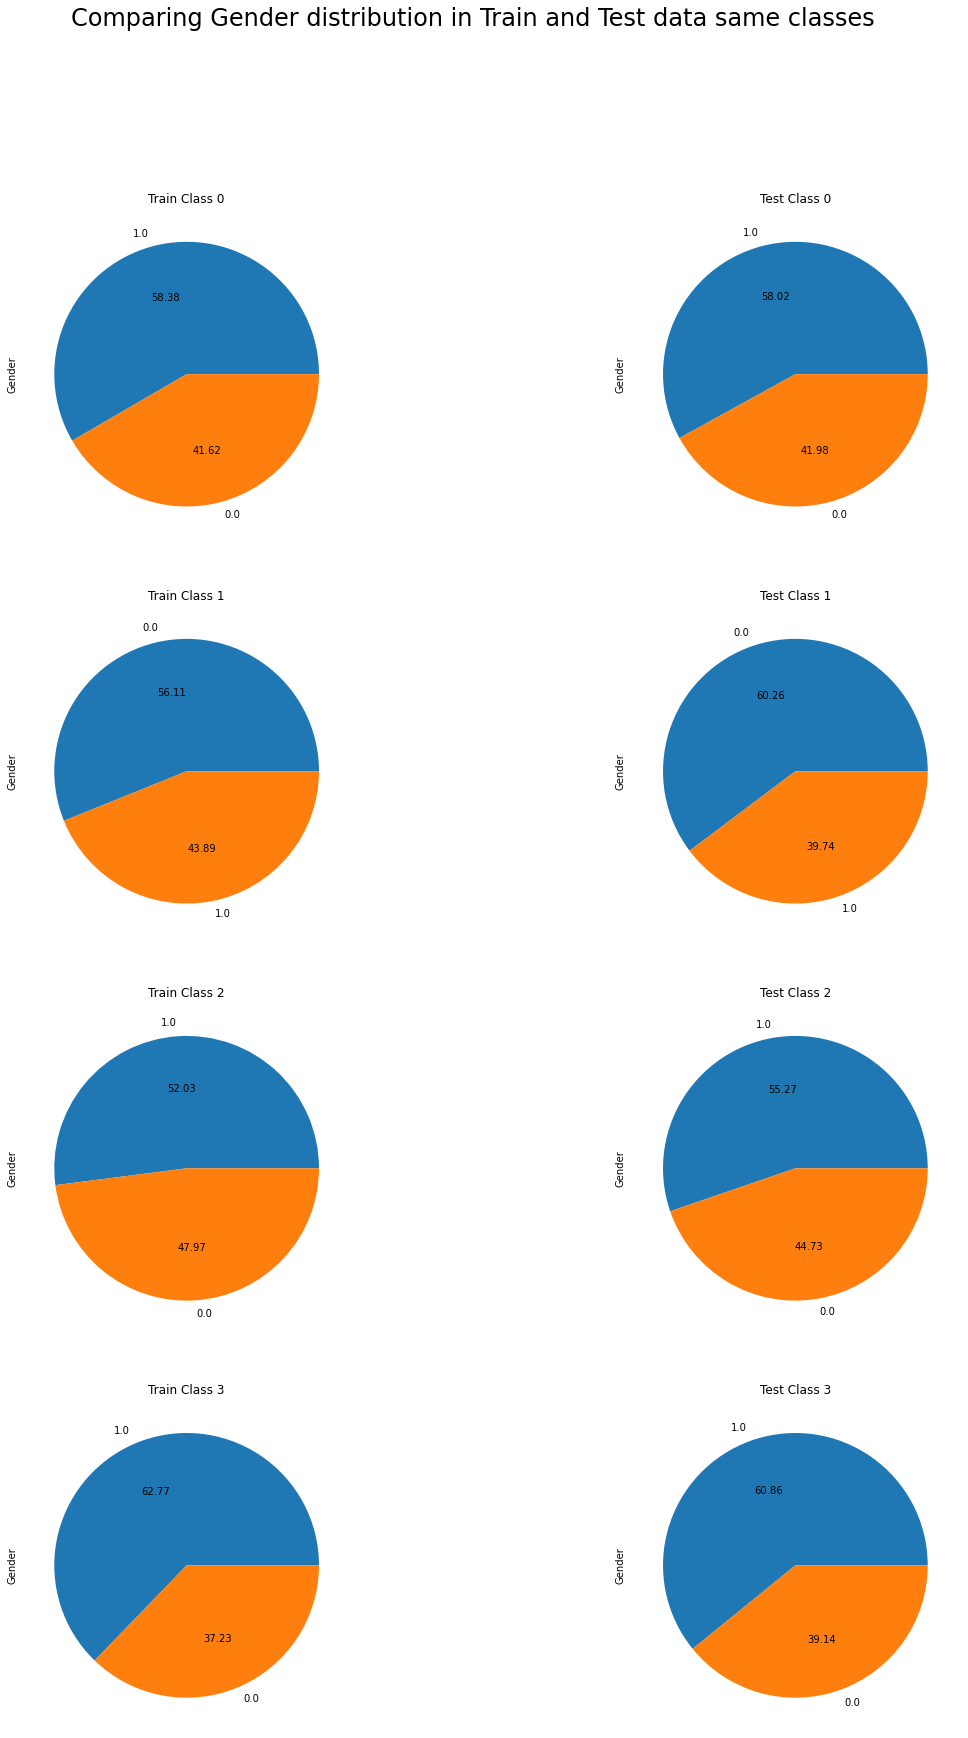

In [44]:
f, ax  = plt.subplots(4,2,figsize = (20,28))
f.suptitle("Comparing Gender distribution in Train and Test data same classes", fontsize=24)

train_class_0['Gender'].value_counts().plot.pie(title='Train Class 0', ax=ax[0][0], autopct="%.2f")
test_class_1['Gender'].value_counts().plot.pie(title='Test Class 0', ax=ax[0][1], autopct="%.2f")

train_class_1['Gender'].value_counts().plot.pie(title='Train Class 1', ax=ax[1][0], autopct="%.2f")
test_class_0['Gender'].value_counts().plot.pie(title='Test Class 1', ax=ax[1][1], autopct="%.2f")

train_class_2['Gender'].value_counts().plot.pie(title='Train Class 2', ax=ax[2][0], autopct="%.2f")
test_class_2['Gender'].value_counts().plot.pie(title='Test Class 2', ax=ax[2][1],autopct="%.2f")

train_class_3['Gender'].value_counts().plot.pie(title='Train Class 3', ax=ax[3][0], autopct="%.2f")
test_class_3['Gender'].value_counts().plot.pie(title='Test Class 3', ax=ax[3][1], autopct="%.2f")

f.patch.set_facecolor('white')
plt.show()

#### <span style="color:blue"> This photo clearly shows that the distribution of the Report variables in Test and Train Data are the same